In [1]:
import torch
from kaggle_environments.envs.hungry_geese.hungry_geese import Action, Configuration, Observation, histogram, translate, row_col
from kaggle_environments import make as kaggle_make
import tqdm

from hungry_geese.env.torch_env import TorchEnv
#device = torch.device('cuda:0')
device = torch.device('cpu')

config = Configuration(kaggle_make('hungry_geese', debug=False).configuration)

Loading environment football failed: No module named 'gfootball'


In [5]:
test_source = torch.arange(5)
test_target = torch.zeros(5)

test_target[:] = test_source
test_target[0] = 100
test_source[1] = 100
print(test_target, test_source)

tensor([100.,   1.,   2.,   3.,   4.]) tensor([  0, 100,   2,   3,   4])


In [ ]:
test = TorchEnv(config, n_envs=100000, n_geese=4, device=device)

moves = torch.zeros((test.n_envs, test.n_geese), dtype=torch.int64, device=device) + 1

profiling_enabled = True
with torch.autograd.profiler.profile(enabled=profiling_enabled, use_cuda=True) as prof:
    test.reset()
    for i in tqdm.trange(40):
        test.step(moves)
print(test.render_env(0, include_info = True))
if profiling_enabled:
    prof.export_chrome_trace(f'trace_{str(device).split(":")[0]}_{test.n_envs}_envs.json')

In [5]:
top_level_events_only = True
if torch.device == torch.device('cpu'):
    print(prof.key_averages().table(sort_by="cpu_time_total"))
else:
    print(prof.key_averages().table(sort_by="cuda_time_total", top_level_events_only=top_level_events_only))

This report only display top-level ops statistics
-----------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-----------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                    aten::sum         0.33%      11.409ms         0.42%      14.552ms      44.637us        2.964s        49.56%        2.971s       9.112ms           326  
                  aten::index         1.08%      37.611ms        63.37%        2.216s       1.532ms     802.079ms        13.41%        1.241s     858.102us          1446  
            aten::multinomial         0.07%       2.354ms         7.29%     254.739ms    

In [66]:
env_idx = 1
test.geese_tensor[env_idx], test.lengths[env_idx]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0]]),
 tensor([4, 0, 3, 0]))

In [63]:
test.dones

tensor([True, True])

In [7]:
test.geese[sc].shape

torch.Size([1, 99, 2])

In [10]:
torch.arange(8).view(2, 4) % torch.tensor([2, 3]).view(2, 1)

tensor([[0, 1, 0, 1],
        [1, 2, 0, 1]])

In [14]:


test.geese[torch.arange(test.n_envs)[test.dones], :, 0] = 1
test.geese.sum()


tensor(0)

In [15]:

n_rows = 7
n_cols = 11

head_locs = torch.multinomial(
    torch.ones((3, n_rows * n_cols)),
    4
)
loc_to_row_column = torch.tensor(
    [row_col(i, n_cols) for i in range(n_rows * n_cols)],
).view(n_rows * n_cols, 2)
loc_to_row_column[head_locs]

tensor([[[2, 8],
         [0, 4],
         [4, 7],
         [6, 2]],

        [[5, 7],
         [5, 4],
         [6, 4],
         [2, 3]],

        [[0, 5],
         [1, 2],
         [4, 8],
         [3, 0]]])

In [1]:
import kaggle_environments
from kaggle_environments.envs.hungry_geese.hungry_geese import Action, Configuration, Observation

from hungry_geese.utils import read_json
from hungry_geese.env.lightweight_env import make_from_state
import main

Loading environment football failed: No module named 'gfootball'


In [2]:
make_from_state(Observation(env.steps[-2][0]['observation']), [Action.NORTH] * 4).done

NameError: name 'env' is not defined

In [9]:
len(env.steps)

200

In [4]:
replay_dict = read_json('/home/isaiah/Downloads/19998794.json')
env = kaggle_environments.make(
    'hungry_geese',
    configuration=replay_dict['configuration'],
    steps=replay_dict['steps'],
    info=replay_dict['info']
)

conf = env.configuration
env.steps[119][0]['observation']['step'] = 0

main.AGENT = None
main.call_agent(env.steps[119][0]['observation'], conf)
main.call_agent(env.steps[120][0]['observation'], conf)
"""
obs = Observation(Observation(env.steps[120][0]['observation']))
main.AGENT.preprocess(obs, conf)
light_env = make_from_state(obs, main.AGENT.last_actions)
main.AGENT.search_tree.run_batch_mcts(light_env.lightweight_clone(), 1, n_iter=2)
out = main.AGENT.search_tree.expand(light_env)
out"""

Step: 1 Index: 0 My initial policy: [0.68, 0.30, 0.02, 0.00] My improved policy: [0.94, 0.03, 0.00, 0.03] My Q-values: [0.19, -0.67, 0.00, -0.33] Selected action: NORTH N-visits: 63 Time allotted: 0.91 Remaining overage time: 40.49 All initial values: [[-0.30], [0.43], [-0.44], [0.30]] All policies: [[0.94, 0.03, 0.00, 0.03], [0.02, 0.00, 0.02, 0.97], [0.10, 0.54, 0.02, 0.35], [0.00, 0.02, 0.02, 0.97]] All Q-values: [[0.19, -0.67, 0.00, -0.33], [-1.00, 0.00, -1.00, 0.40], [-0.78, -0.83, -1.00, -0.91], [0.00, -0.33, -1.00, 0.38]] 
Step: 121 Index: 0 My initial policy: [0.45, 0.55, 0.00, 0.00] My improved policy: [0.97, 0.03, 0.00, 0.00] My Q-values: [0.53, -1.00, 0.00, 0.00] Selected action: NORTH N-visits: 63 Time allotted: 0.91 Remaining overage time: 40.49 All initial values: [[0.21], [-0.00], [-0.40], [0.19]] All policies: [[0.97, 0.03, 0.00, 0.00], [0.59, 0.00, 0.00, 0.41], [0.00, 1.00, 0.00, 0.00], [0.00, 0.00, 0.49, 0.51]] All Q-values: [[0.53, -1.00, 0.00, 0.00], [0.09, 0.00, 0.

"\nobs = Observation(Observation(env.steps[120][0]['observation']))\nmain.AGENT.preprocess(obs, conf)\nlight_env = make_from_state(obs, main.AGENT.last_actions)\nmain.AGENT.search_tree.run_batch_mcts(light_env.lightweight_clone(), 1, n_iter=2)\nout = main.AGENT.search_tree.expand(light_env)\nout"

In [30]:
light_env.step_counter

120

In [28]:
print(light_env.render_ansi())

+---+---+---+---+---+---+---+---+---+---+---+
|   |   | 1 | 1 | 2 | 2 | F | 2 | 0 |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 2 | 2 | 2 | 2 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+---+---+---+---+
| 3 |   |   | 0 | 0 | 0 | 2 | 2 | 2 | 3 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+
| 3 | 3 |   |   | 0 | 0 | 2 | 2 | 2 | 3 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+
| 3 | 3 |   |   | 0 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
| 3 |   |   | 1 | 0 | 0 | 2 | F |   | 3 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   | 1 | 0 | 0 | 2 | 2 |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+



In [5]:
env.render(mode='ipython', height=700, width=800)

In [19]:
n_geese = 4
values = torch.arange(8).view(2,4).to(torch.float)
still_alive = torch.ones_like(values).to(torch.bool)
still_alive[0,0:2] = False


values.masked_fill_(~still_alive, float('-inf'))
win_probs = torch.softmax(values, dim=-1)
print(win_probs)
remaining_rewards = torch.linspace(0., 1., n_geese, dtype=torch.float)
remaining_rewards_min = remaining_rewards[-still_alive.sum(dim=-1)].unsqueeze(-1)
remaining_rewards_var = 1. - remaining_rewards_min
values = remaining_rewards_min + win_probs * remaining_rewards_var
# TODO: This is a hacky solution - there should be a more elegant way to do this for any n_geese_remaining?
print(values)
values = torch.where(
    still_alive.sum(dim=-1, keepdim=True) == 4,
    values * 2.,
    values
)
values = torch.where(
    still_alive.sum(dim=-1, keepdim=True) == 3,
    values * 1.2,
    values
)

print(values)
max_vals = values.max(dim=-1, keepdim=True)[0]
values = torch.where(
    max_vals > 1.,
    torch.where(
        values == max_vals,
        values - (max_vals - 1.),
        values + (max_vals - 1.) / still_alive.sum(dim=-1, keepdim=True)
    ),
    values
)
print(values)
values * 2. - 1

tensor([[0.0000, 0.0000, 0.2689, 0.7311],
        [0.0321, 0.0871, 0.2369, 0.6439]])
tensor([[0.6667, 0.6667, 0.7563, 0.9104],
        [0.0321, 0.0871, 0.2369, 0.6439]])
tensor([[0.6667, 0.6667, 0.7563, 0.9104],
        [0.0641, 0.1743, 0.4738, 1.2878]])
tensor([[0.6667, 0.6667, 0.7563, 0.9104],
        [0.1361, 0.2462, 0.5457, 1.0000]])


tensor([[ 0.3333,  0.3333,  0.5126,  0.8207],
        [-0.7279, -0.5075,  0.0914,  1.0000]])

In [2]:
DEVICE = torch.device('cuda')

obs_type = ge.ObsType.COMBINED_GRADIENT_OBS
n_channels = 128
activation = nn.ReLU
normalize = False
model_kwargs = dict(
    block_class=models.BasicConvolutionalBlock,
    conv_block_kwargs=[
        dict(
            in_channels=obs_type.get_obs_spec()[-3],
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=normalize
        ),
        dict(
            in_channels=n_channels,
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=normalize
        ),
        dict(
            in_channels=n_channels,
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=normalize
        ),
    ],
    squeeze_excitation=True,
    cross_normalize_value=True,
    # **ge.RewardType.RANK_ON_DEATH.get_recommended_value_activation_scale_shift_dict()
)
model = models.FullConvActorCriticNetwork(**model_kwargs)

In [1]:
import base64
import copy
from kaggle_environments import make as kaggle_make
from kaggle_environments.envs.hungry_geese.hungry_geese import Action, Configuration, Observation
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pickle
from scipy import special, stats
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.cuda import amp
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm

from hungry_geese import models
from hungry_geese.utils import ActionMasking
from hungry_geese.env import goose_env as ge
from hungry_geese.env.lightweight_env import LightweightEnv, make_from_state
from hungry_geese.mcts.basic_mcts import BasicMCTS
from hungry_geese.training.alphagoose.alphagoose_data import AlphaGoosePretrainDataset, ToTensor
from hungry_geese.utils import read_json

%matplotlib inline
DEVICE = torch.device('cuda')

Loading environment football failed: No module named 'gfootball'


In [4]:
obs_type = ge.ObsType.COMBINED_GRADIENT_OBS
n_channels = 64
activation = nn.ReLU
model_kwargs = dict(
    block_class=models.BasicConvolutionalBlock,
    conv_block_kwargs=[
        dict(
            in_channels=obs_type.get_obs_spec()[-3],
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=False
        ),
        dict(
            in_channels=n_channels,
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=False
        ),
        dict(
            in_channels=n_channels,
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=False
        ),
        dict(
            in_channels=n_channels,
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=False
        ),
        dict(
            in_channels=n_channels,
            out_channels=n_channels,
            kernel_size=3,
            activation=activation,
            normalize=False
        ),
    ],
    squeeze_excitation=True,
    cross_normalize_value=True,
    # **ge.RewardType.RANK_ON_DEATH.get_recommended_value_activation_scale_shift_dict()
)
model = models.FullConvActorCriticNetwork(**model_kwargs)
model.to(device=DEVICE)

run_dir = Path('runs/supervised_pretraining/active/supervised_pretraining_combined_gradient_obs_rank_on_death_none_5_blocks_64_dims_v1/')
with open(run_dir / '0070/cp.txt', 'r') as f:
    serialized_string = f.readline()[2:-1].encode()
state_dict_bytes = base64.b64decode(serialized_string)
loaded_state_dicts = pickle.loads(state_dict_bytes)
model.load_state_dict(loaded_state_dicts)

def action_mask_func(state):
    return ActionMasking.LETHAL.get_action_mask(state)
    
def terminal_value_func(state):
    agent_rankings = stats.rankdata([agent['reward'] for agent in state], method='average') - 1.
    ranks_rescaled = 2. * agent_rankings / (len(state) - 1.) - 1.
    return ranks_rescaled
    
def actor_critic_func(state):
    geese = state[0]['observation']['geese']
    n_geese = len(geese)
    
    obs = ge.create_obs_tensor(state, obs_type)
    head_locs = [goose[0] if len(goose) > 0 else -1 for goose in geese]
    still_alive = [agent['status'] == 'ACTIVE' for agent in state]
    with torch.no_grad():
        logits, values = model(torch.from_numpy(obs),
                               torch.tensor(head_locs).unsqueeze(0),
                               torch.tensor(still_alive).unsqueeze(0))
    
    # Score the dead geese
    dead_geese_mask = np.array([len(goose) for goose in geese]) == 0
    agent_rankings = stats.rankdata([agent['reward'] for agent in state], method='average') - 1.
    agent_rankings_rescaled = 2. * agent_rankings / (n_geese - 1.) - 1.
    
    logits = F.softmax(logits, -1)
    final_values = np.where(
        dead_geese_mask,
        agent_rankings_rescaled,
        values.squeeze(0).numpy()
    )
    
    # Logits should be of shape (4, 4)
    # Values should be of shape (4, 1)
    return logits.squeeze(0).numpy().astype(np.float), final_values[:, np.newaxis]

In [5]:
with open(run_dir / 'train_episodes.txt', 'r') as f:
    train_episodes = [replay_name.rstrip() for replay_name in f.readlines()]
    train_episodes = set(train_episodes)
with open(run_dir / 'test_episodes.txt', 'r') as f:
    test_episodes = [replay_name.rstrip() for replay_name in f.readlines()]
    test_episodes = set(test_episodes)

dataset_loc = Path('/home/isaiah/data/alphagoose_data_1000/')
train_dataset = AlphaGoosePretrainDataset(
    dataset_loc,
    ge.ObsType.COMBINED_GRADIENT_OBS,
    transform=ToTensor(),
    include_episode=lambda x: x.stem in train_episodes
)
test_dataset = AlphaGoosePretrainDataset(
    dataset_loc,
    ge.ObsType.COMBINED_GRADIENT_OBS,
    transform=ToTensor(),
    include_episode=lambda x: x.stem in test_episodes
)
dataloader_kwargs = dict(
    batch_size=512,
    shuffle=True,
    num_workers=6,
    pin_memory=True
)
train_dataloader = DataLoader(train_dataset, **dataloader_kwargs)
test_dataloader = DataLoader(test_dataset, **dataloader_kwargs)

In [8]:
def compute_losses(
        state,
        action,
        result,
        head_locs,
        still_alive,
        reduction='mean',
        get_preds=False
):
    with amp.autocast():
        logits, value = model(state, head_locs, still_alive)

        logits_masked = logits.view(-1, 4)[still_alive.view(-1, 1).expand(-1, 4)].view(-1, 4)
        action_masked = action.view(-1)[still_alive.view(-1)]
        policy_loss = F.cross_entropy(logits_masked, action_masked, reduction=reduction)

        value_masked = value.view(-1)[still_alive.view(-1)]
        result_masked = result.view(-1)[still_alive.view(-1)]
        value_loss = F.mse_loss(value_masked, result_masked, reduction=reduction)

        probs_masked = F.softmax(logits_masked, dim=-1)
        entropy_loss = torch.sum(probs_masked * torch.log(probs_masked), dim=-1)
        if reduction == 'none':
            pass
        elif reduction == 'mean':
            entropy_loss = entropy_loss.mean()
        elif reduction == 'sum':
            entropy_loss = entropy_loss.sum()
        else:
            raise ValueError(f'Unrecognized reduction: {reduction}')

        combined_loss = policy_loss + value_loss + 0.05 * entropy_loss

    if get_preds:
        return policy_loss, value_loss, entropy_loss, combined_loss, logits_masked.argmax(dim=-1)
    else:
        return policy_loss, value_loss, entropy_loss, combined_loss

test_metrics = {
    'policy_loss': 0.,
    'value_loss': 0.,
    'entropy_loss': 0.,
    'combined_loss': 0.,
    'policy_accuracy': 0.
}
n_test_samples = 0.
with torch.no_grad():
    for test_tuple in tqdm(test_dataloader):
        test_tuple = [t.to(device=DEVICE) for t in test_tuple]
        state, action, result, head_locs, still_alive = test_tuple
        policy_loss, value_loss, entropy_loss, combined_loss, preds = compute_losses(
            *test_tuple,
            reduction='mean',
            get_preds=True
        )
        action_masked = action.view(-1)[still_alive.view(-1)]

        test_metrics['policy_loss'] += policy_loss.detach().cpu().item()
        test_metrics['value_loss'] += value_loss.detach().cpu().item()
        test_metrics['entropy_loss'] += entropy_loss.detach().cpu().item()
        test_metrics['combined_loss'] += combined_loss.detach().cpu().item()
        test_metrics['policy_accuracy'] += preds.eq(action_masked).sum().cpu().item()
        n_test_samples += still_alive.sum().cpu().item()

    for key, metric in test_metrics.items():
        test_metrics[key] = metric / n_test_samples

100%|██████████| 624/624 [00:31<00:00, 20.05it/s]


In [7]:
# Train metrics
print(test_metrics)

{'policy_loss': 0.4371913615361365, 'value_loss': 0.41850482532036665, 'entropy_loss': -0.44604222998258236, 'combined_loss': 0.8333940757102729, 'policy_accuracy': 0.8136260987016325}


In [8]:
# Train metrics
print(test_metrics)

{'policy_loss': 0.43037240807166505, 'value_loss': 0.4173613712729071, 'entropy_loss': -0.43618069194549325, 'combined_loss': 0.8259247446410529, 'policy_accuracy': 0.8167726010922804}


In [11]:
# Test metrics
print(test_metrics)

{'policy_loss': 0.42855011108139346, 'value_loss': 0.42127980300779555, 'entropy_loss': -0.4349617097848291, 'combined_loss': 0.8280818274144608, 'policy_accuracy': 0.8172688338726312}


In [23]:
# Train metrics
print(test_metrics)

{'policy_loss': 0.4257879632282377, 'value_loss': 0.4158035698730922, 'entropy_loss': -0.4337383575702471, 'combined_loss': 0.8199046156556633, 'policy_accuracy': 0.8189363668449229}


In [21]:
# Test metrics
print(test_metrics)

{'policy_loss': 0.4382235467093052, 'value_loss': 0.421744274073616, 'entropy_loss': -0.43470627838253767, 'combined_loss': 0.838232505807227, 'policy_accuracy': 0.8129718289517551}


In [40]:
#env = kaggle_make('hungry_geese', debug=True)
#env.reset(num_agents=4);
replay_dict = read_json('/home/isaiah/Downloads/19528131.json')
env = kaggle_make(
    'hungry_geese',
    configuration=replay_dict['configuration'],
    steps=replay_dict['steps'],
    info=replay_dict['info']
)
env.render(mode='ipython', height=700, width=800)

In [43]:
search_tree = BasicMCTS(
    action_mask_func=action_mask_func,
    actor_critic_func=actor_critic_func,
    terminal_value_func=terminal_value_func,
    c_puct = 1.,
    include_food=False
)
step_idx = 120
state = env.steps[step_idx][0]
state.update(env.steps[step_idx][0]['observation'])
obs = Observation(state)
light_env = make_from_state(
    obs,
    [Action[agent['action']] for agent in env.steps[-1]],
    env.configuration
)
print(light_env.render_ansi())

root_node = search_tree.run_mcts(
    env=light_env,
    n_iter=10000,
    max_time=0.5
)
print(root_node.initial_policies)
print(root_node.initial_values)
print(root_node.q_vals)
print(root_node.n_visits / root_node.n_visits.sum(axis=1, keepdims=True))
print(root_node.n_visits.sum(axis=1)[0])

+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   | 0 | 0 | 0 |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   | 2 | 2 | 2 | 2 | 2 |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   | 2 |   |   |   | 2 |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
| 2 | 2 | 2 | 2 |   |   |   | 2 |   | F | 2 |
+---+---+---+---+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 |   |   |   |   |   |   | 2 |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   | 0 |   | 0 | 0 | 0 | 0 | 0 | F |
+---+---+---+---+---+---+---+---+---+---+---+

[[0.71048282 0.14153491 0.14798227 0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.         0.24634647 0.52834258 0.22531095]
 [0.25       0.25       0.25       0.25      ]]
[[ 0.59743631]
 [-0.66666667]
 [ 0.73589694]
 [-0.66666667]]
[[ 0.491229    0.48122471  0.5756302   0.        ]
 [-0.666

In [9]:
search_tree = BasicMCTS(
    action_mask_func=action_mask_func,
    actor_critic_func=actor_critic_func,
    terminal_value_func=terminal_value_func,
    c_puct = np.sqrt(2.),
    include_food=False
)
while not env.done:
    state = env.steps[-1][0]
    state.update(env.steps[-1][0]['observation'])
    obs = Observation(state)
    light_env = make_from_state(
        obs,
        [Action[agent['action']] for agent in env.steps[-1]],
        env.configuration
    )
    print(light_env.render_ansi())
    
    csr = light_env.canonical_string_repr(include_food=search_tree.include_food)
    for key in list(search_tree.nodes.keys()):
        if key.startswith(f'S: {obs.step - 1}') or (key.startswith(f'S: {obs.step}') and key != csr):
            del search_tree.nodes[key]
    root_node = search_tree.run_mcts(
        env=light_env,
        n_iter=10000,
        max_time=0.3
    )
    print(root_node.n_visits)
    print(int(root_node.n_visits.sum() / 4))
    actions = root_node.get_improved_actions(0.)
    env.step([tuple(Action)[a].name for a in actions])

+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | 1 |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   | F |   |
+---+---+---+---+---+---+---+---+---+---+---+
| 2 | 3 |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
| 0 |   |   |   |   |   |   | F |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+

[[ 0.  1.  8. 46.]
 [ 1. 13. 37.  4.]
 [16.  1.  2. 36.]
 [32. 20.  3.  0.]]
55
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   | 3 |   |   |   |   |   | 1 |   | F |   |
+---+---+---+---+---+---+---+---+---+---+---+

[[ 18.  57.  31.   0.]
 [  4.   0. 101.   1.]
 [  5.  92.   9.   0.]
 [  0.   1.   3. 102.]]
106
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   | F |   |   |   |   |   |   | 2 | 2 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
| F | 1 |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   | 0 | 0 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+

[[ 19.  62.  34.   0.]
 [  0.   1.   1. 113.]
 [ 29.  16.  70.   0.]
 [ 94.   0.  21.   0.]]
115
+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   | 3 |
+---+---+---+---+---+--

KeyboardInterrupt: 

In [50]:
actor_critic_func(env.steps[-12])

(array([[8.61005610e-05, 8.18011984e-02, 9.17979240e-01, 1.33459238e-04],
        [7.05577552e-01, 2.67871469e-01, 2.63237916e-02, 2.27250930e-04],
        [5.67054689e-01, 3.72127943e-05, 4.32632983e-01, 2.75225029e-04],
        [3.02594784e-03, 9.94118452e-01, 1.85178372e-03, 1.00375735e-03]]),
 array([[-0.40664357],
        [-0.20638818],
        [ 0.30959868],
        [ 0.30343318]]))

In [10]:
env.render(mode='ipython', height=700, width=800)

NameError: name 'env' is not defined

In [20]:
print(root_node.n_visits)
print(int(root_node.n_visits.sum() / 4))
root_node.q_vals

[[ 10.  49. 127.  98.]
 [ 90.  32.   6. 156.]
 [ 56. 158.  12.  58.]
 [  2.   7.   3. 272.]]
284


array([[-1.15636349e-02, -7.31000000e-03,  1.66598831e-02,
        -8.63443406e-03],
       [-5.13096717e-03, -4.64147590e-02, -1.50462488e-02,
        -1.80740412e-02],
       [ 1.71189053e-02, -3.26424485e-03,  2.90890038e-03,
         8.26274527e-05],
       [ 2.28927732e-02, -2.52798966e-02,  1.06576284e-02,
         1.35208759e-02]])

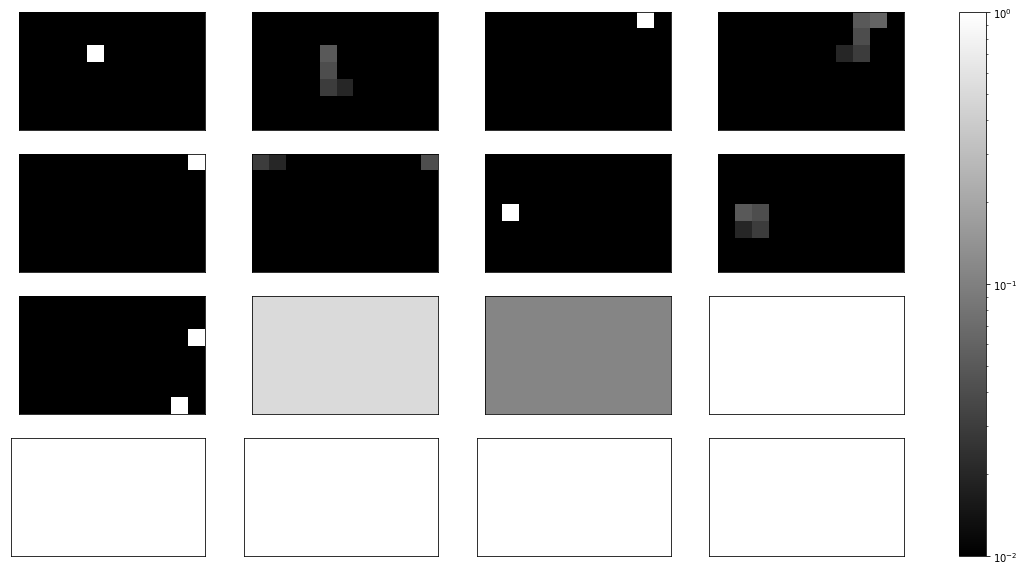

In [55]:
import matplotlib.colors as colors
for s, a, r, hl, alive in ag_dataloader:
    square = np.ceil(np.sqrt(s.shape[1])).astype(np.int)
    fig, axs = plt.subplots(square, square, figsize=(20,10))
    ix = 0
    for i in range(square):
        for j in range(square):
            ax = axs[i, j]
            ax.set_xticks([])
            ax.set_yticks([])
            eps = 1e-2
            if ix < s.shape[1]:
                pcm = ax.imshow(s[0, ix, :, :] + eps, norm=colors.LogNorm(vmin=eps, vmax=1.), cmap='gray')
                ix += 1
    fig.colorbar(pcm, ax = axs)
    plt.show()
    break